# Question 1

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

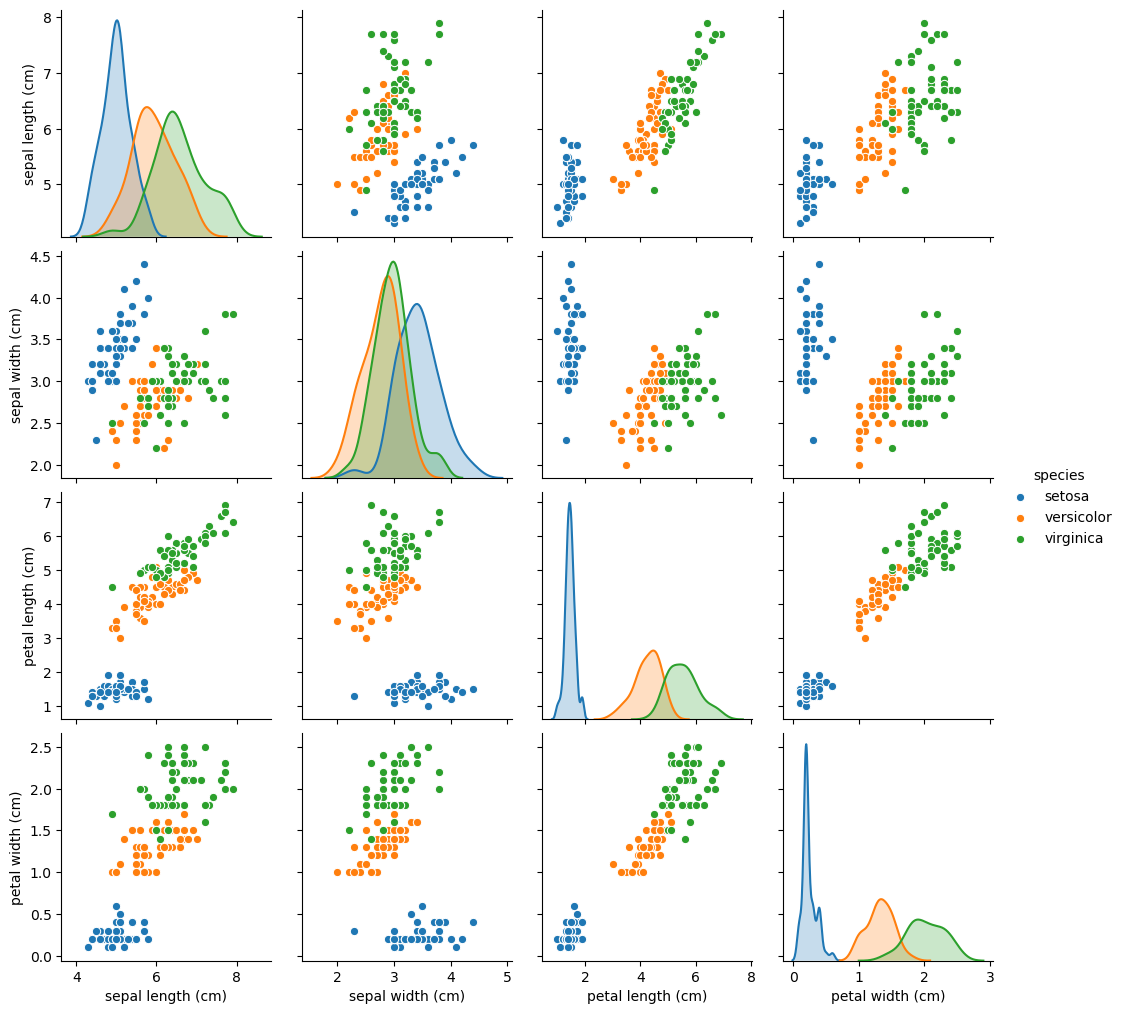

In [9]:
# importing important libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

#loading iris dataset from sklearn
iris = load_iris()

#converting the dataset to pandas formate
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

# adding a column named species which contains class names
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#removing target_value column
df = df.drop(columns="target")
print(df)
#plotting the pairplot using seaborn
g = sns.pairplot(df, hue = 'species')


### Q-1.1: Describe in words your interpretation of the separability of the three classes in terms of diﬀerent features (dimensions).

In iris dataset we have total of 4 features Sepal Length, Sepal width, Petal length and petal width. And we get 4 by 4 matrix of scatter plots and histograms. In here we can observe that we have histograms diagonally which are dividing scatter plots, and we can see that the scatter plots above and below the histogram are the same or the mirror image. 

We will focus on upper half of the histogram for analysis of seperability. We have to find the most useful features. So, by analysing first and second row of scatter plot we can say that scatter plot of Sepal length vs petal length and Sepal length vs petal width are the best scatter plots, as it provides better seperability compared to other scatter plots in that first and second row.

For both the sepal length vs petal length and sepal length vs petal width we can plot a simple verticle line on the X-axis. So, we can say that petal length and petal width are the most seperable features. 

By analysing all the 6 scatter plots above the histograms we can conclude that scatter plot of petal length vs petal width has the best seperability and low variability. So, we can conclude that petal_length and petal_width are the most useful features to identify various flower types.

By analysing histograms we can say that, the histogram of petal_length and petal_width gives us clear seperability as we can clearly see different classe like setosa is clearly linearly seprable. Versicolor and verginica does have some overlap but it is not as bad as in the histogram of sepal length and sepal width. 

#### Conclusion: 1. By analysing pair plots we can conclude that petal length and petal width are the most prominent features to classify the data in appropriate target classes. 2. While analysing the histograms we can say that setosa class can be easily identified (linearly seperable) where as virnica and versicolor have some overlap(almost linearly seperable) in each histogram.

# Question 2

In [10]:
#importing important libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#loading dataset from sklearn dataset
iris = load_iris()

# converting dataset to pandas
data = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])

# dividing dataset into X - features and y - target features
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data['target']

# splitting the dataset into 60% train data, 20% validation data and 20% test datasets.
X_t, X_test, y_t, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
X_train,X_validation,y_train,y_validation = train_test_split(X_t,y_t,test_size = 0.25,random_state = 42)

In [11]:
# train model with each classifiers default parameter
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default value of K is 5
knn.fit(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(test_accuracy)

0.9666666666666667


#### The test accuracy on the default parameter of KNN is 96.67%

[0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


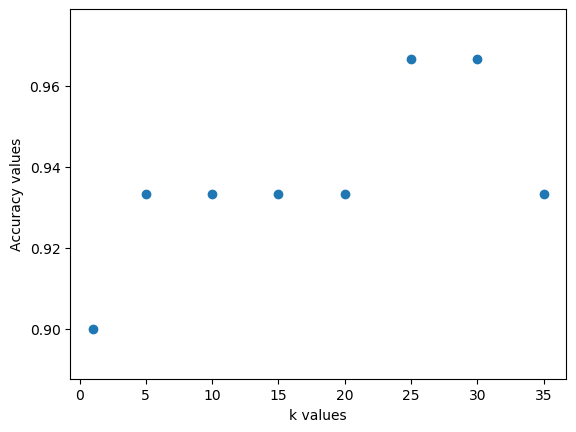

In [12]:

# different values of K for KNN classifier
k = [1,5,10,15,20,25,30,35]
accuracy_score = []

#get the accuracy score on different values of k
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_score.append(knn.score(X_validation, y_validation))
print(accuracy_score)

# plot accuracy vs k value scatter plot to analyse and find out the best value of k.
plt.figure()
plt.xlabel('k values')
plt.ylabel('Accuracy values')
plt.scatter(k, accuracy_score)


#### In here we are getting highest accuracy of 96.67% on two k values of 25 and 30. But, as the number of K nearest neighbors, increases our algorithm has to search for more number of nearest neighbors which is computationally expensive. So, smaller value of K will be less computationally expensive, and for that reason only we can say that K = 25 is the optimal value of K as it will be computationally less expensive compared to K = 30. 

#### So, we will test the model, on the optimal value of K = 25.

In [13]:
# testing on the best accuracy dataset 
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
best_accuracy_test = knn.score(X_test, y_test)
print(best_accuracy_test)

1.0


#### If we test the model with the optimal value of K = 25, we get the 100% accuracy. which is more than the 96.67% accuracy we get from K = 5. So, we can say that we have choosen the optimal value of K.


# Question 3

[0.9583333333333334, 0.9583333333333333, 0.9583333333333333, 0.9583333333333334, 0.9583333333333334, 0.95, 0.9333333333333332, 0.9333333333333332]


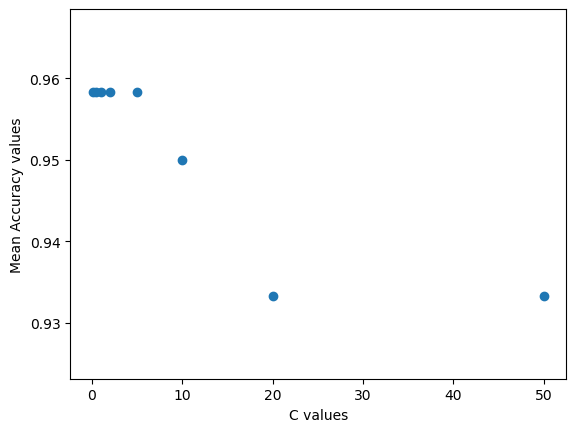

In [14]:
# importing the libraries
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#splitting dataset into 80-20 train-test split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#different values of C for tuning of the C hyperparameter of Linear SVM
C = [0.1,0.5,1,2,5,10,20,50]
plot_mean_scores = []

# applying cross validation score on the 
for m in C:
    classifier = SVC(kernel = 'linear', C = m, random_state = 42)
    scores = cross_val_score(classifier,X_train_validation, y_train_validation, cv = 10)
    plot_mean_scores.append(scores.mean())


print(plot_mean_scores)

#plotting mean accuracy vs C values scatter plot to analyse the validation results.
plt.figure()
plt.xlabel('C values')
plt.ylabel('Mean Accuracy values')
plt.scatter(C, plot_mean_scores)


#### We get the highest accuracy of 96.67% for 5 values of C = 0.5, 1, 2, 5 , 10. Now, as we know that for low value of C we get large margin which is used to avoid overfitting of the data means our optimal hyperplane is at the maximum distance from both the classes (equal distance from the boundary line). If we have higher value of C then that means that our decision boundry line is closser to the dataset and the margin isn't large and it may cause overfitting.

#### So, out of all the C values we can say that the C = 0.5 is the best value as it provides us with the largest possible margin with low misclassification.

In [15]:
# test accuracy on the best values of C.
classifier = SVC(kernel = 'linear', C =0.5 , random_state = 42)
classifier.fit(X_train_validation, y_train_validation)
store = classifier.score(X_test,y_test)

print(store)

1.0


#### we are getting 100% accuracy on the test data so, we can say that our selection of C = 0.5 is correct. 

# Question 4

## Decision Trees

[0.9333333333333332, 0.9166666666666666, 0.9249999999999998, 0.9249999999999998]


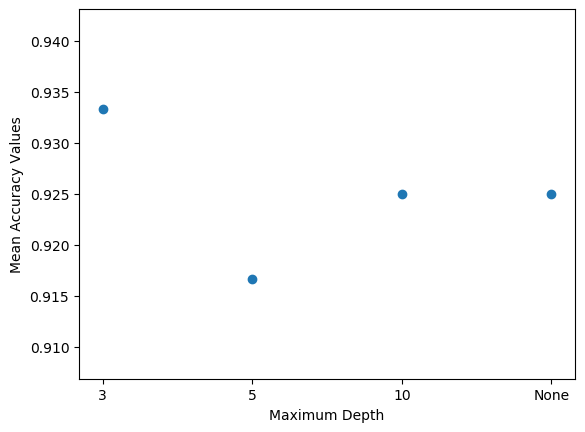

In [16]:
#importing libraries
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint

#splitting data into 80-20 train-test data split.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#differnt values of max_depth 
max_depth = [3,5,10,None]
mean_accuracy_of_DecisionTree = []

#using 10 fold cross validation to find optimal value of C
for n in max_depth:
    classifier = tree.DecisionTreeClassifier(max_depth = n, random_state = 42)
    s = cross_val_score(classifier, X_train, y_train, cv = 10)
    mean_accuracy_of_DecisionTree.append(s.mean())
print(mean_accuracy_of_DecisionTree)

# To find the best accuracy plotting the 
import matplotlib.pyplot as plt
max_depth = ['3','5','10','None']
plt.figure()
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Accuracy Values')
plt.scatter(max_depth, mean_accuracy_of_DecisionTree)

After analysing above plot of mean accuracy vs maximum depth for decision tree we can conclude that the maximum depth of 3 gives us the highest accuracy. Beacuse if we keep maximum depth of None then our decision tree will have tree which is fully expanded and all the leaves are pure that decision tree will lead to overfitting as the tree isn't generalized. For maximum depth of 3 we can say that out tree is generalized. Now, let us check the best maximum depth on the test dataset.

In [17]:
# for max_depth of 3
classifier = tree.DecisionTreeClassifier(max_depth = 3, random_state = 42)
classifier.fit(X_train, y_train)
accuracy = classifier.score(X_test, y_test)
print(accuracy)

1.0


For the maximum depth value of 3 we are getting 100% accuracy.

## Gradient Tree Boosting

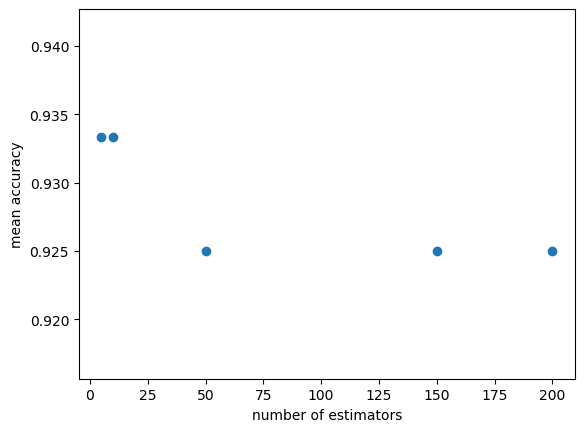

In [18]:
#importing libraries
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

#number of estimators 
estimators = [5,10,50,150,200]
mean = []
test = []

#Finding the best value of estimators using the 10 fold cross validation method
for i in estimators:
    GTB = GradientBoostingClassifier(n_estimators = i, random_state = 42)
    s = cross_val_score(GTB, X_train,y_train, cv=10)
    mean.append(s.mean())

#plotting scatter plot of mean accuracy vs number of estimators to find the best number of estimators.
plt.figure()
plt.xlabel('number of estimators')
plt.ylabel('mean accuracy')
plt.scatter(estimators, mean)

In here as the number of estimators increases the accuracy of the gradient boosting model decreases. So, we get the best accuracy for number of accuracy = 5.

In [19]:
GTB = GradientBoostingClassifier(n_estimators = i, random_state = 42)
GTB.fit(X_train,y_train)
val = GTB.score(X_test,y_test)
print(val)

1.0


## Random Forest

In [ ]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

#number of estimators and max_depth
num_trees = [5,10,50,150,200]
max_depth = [3,5,10,None]
heat_map = []
f = [] 

#tuning hyperparameter using 10 fold cross validation 
for i in num_trees:
    heat_map = []
    for j in max_depth:
        random_forest = RandomForestClassifier(n_estimators = i, max_depth = j, random_state = 42)
        score = cross_val_score(random_forest, X_train, y_train, cv =10)
        heat_map.append(score.mean())
    f.append(heat_map)

f_array = np.asarray(f)
print(f_array)

#plotting heatmap of obtained data from 10 fold cross validation
hm = sns.heatmap(f_array)

In the random forest we are changing maximum depth and number of estimators and finding mean accuracy for each combination of maximum depth and number of estimators. We have 5 values in number of estimators and 4 values in maximum depth. So, we will have 20 combinations of mean accuracy. We plot the mean accuracy using Heatplot with the help of seaborn library.

We can say that as the number of estimators increase the accuracy of our model also goes on increasing. Also, lower the maximum depth higher the accuracy of the model. So, we can say that for random forest the optimal value of maximum depth is 3 and the optimal value of the number of estimator is 50. Now, let's observe it's test accuracy.

In [ ]:
# to measure test accuracy on the test dataset
random_forest = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state = 42)
random_forest.fit(X_train, y_train)
storing_acc = random_forest.score(X_test,y_test)
print(storing_acc)

We are getting the 100 percent accuracy for our optimal values of maximum depth = 3 and for optimal value of number of estimators = 50.

# Question 5

### 1. Explain why you had to split the dataset into train and test sets?

We generally split our main dataset into train and test dataset. Training dataset uses the samples of data as a set of examples used for learning, that is to fit the training samples into a model. Test dataset uses the samples of data as a set of examples used only to assess the performance of the model. 

If we don’t split datasets into train and test dataset, and use the entire dataset to fit all the samples into the model then evaluation of a model skill on the training dataset would give us biased score because we are using the same data samples for testing  and training of the model. That is why it is really a good idea to split the dataset in the train and test dataset, and use the train data set to create a model and the final model evaluation must be performed on a held out dataset(test dataset) that has not been used prior either for training or tuning the model parameter so that we get unbiased estimate of the model accuracy.


### 2. Explain why when ﬁnding the best parameters for KNN you didn’t evaluate directly on the test set and had to use a validation test.

For KNN while finding the best parameters I evaluated first on the validation test and then to test the model I used test dataset to find the performance of our model. I used validation set to tune the hyperparameters of the classifier. In KNN the hyperparameters is the K value of the KNN. In here I first analysed different values of the K based on their accuracy, based on validation test set. And from manually analyzing the accuracy of the validation test set on different K values we choose the best K value for our model. So, we manually tuned the hyperparameter K of KNN classifier. And then for the best K value of KNN classifier I used held out/ test dataset to test if the tuned hyperparameter is giving us good accuracy on the trained model. If we directly use test dataset for finding the best parameter then we have to use the same dataset we used for training and testing and that will give us biased score as we are evaluating the model on the same dataset.

### 3. What was the eﬀect of changing k for KNN. Was the accuracy always aﬀected the same way with an increase of k? Why do you think this happened?

Generally in the KNN classifier, smaller value of K will make our classifier sensitive to noise and can also lead to the overfitting. Large values of K can lead our classifier to underfit the data. We tested this KNN classifier on different values of K = [1, 5, 10, 15, 20, 25, 30 , 35]. When we increased the value of K the accuracy of the model increased from 90% at K=1, to 93% at K=5,10,15 and 20 values. After that for the value of K = 25 and 30 we got the highest accuracy of 96%. And after that the accuracy of the model decreased again to 93% for K = 35. So, we can say that we reached the highest accuracy of 96% at K = 25 and 30 and after that the accuracy decreased. So, we can say that K = 25 and 30 are the best K values.

For the K values of 1, 5, 10, 15, 20 and 35 we are getting accuracy of 90% and 93%. But for the K values of 25 and 30 we are getting the highest accuracy. The reason behind that is if our classifier looks at 1, 5, 10, 15, 20 and 35 nearest neighbors and tries to classify the data but for these values of K our model doesn’t generalize well. But for K values of 25 and 30 our model generalizes better, gives us low error because it gives us better decision boundary compared to other values of K. Small values of k we get overfitting for large values underfit and for 25 and 30 we have a good fit.


### 4. What was the relative eﬀect of changing the max depths for decision tree and random forests? Explain the reason for this.

In the Decision tree classifiers effect of changing max depth can be easily observed. If we put max-depth to none then we will get the tree where all the leaves are pure, which leads to overfitting. As it will give us 100% accuracy on training set and relatively low accuracy on the test set. To stop the overfitting we have to use pre-pruning in the Decision Tree. And by setting max-depth to 3 we get the highest accuracy as the Decision Tree is very generalized and it also shows that the overfitting is no longer there.

To solve the overfitting problem we use Random Forest Approach. In the Random Forest Classifier gives us better accuracy compared to single decision tree based classifier. The fundamental concept behind random forest is simple and powerful that a large number of relatively uncorrelated models(random trees) operating as a committee will outperform any of the individual constituent models(Decision tree). In random forests too for tree max-depth of 3 gives us the best accuracy compared to any other max-depth. Because even for more numbers of data we have overfitting which results in less generalization and poor performance of the model on test dataset.


### 5. Comment on the eﬀect of the number of estimators for Gradient Tree Boosting and what was the relative eﬀect performance of gradient boosting compared with random forest. Explain the reason for this.

In the random forest as the number of estimators increases the accuracy of the classifier also increases, and in the gradient boosting classifier as number of trees increases the accuracy of the model decreases. The reason behind this behavior of random forest and gradient boosting algorithm is quite simple. 

In the random forest classifier, the number of trees are built randomly and the trees have no correlation between them. In random forest large number of trees, combined (using average or “majority rules”) at the end of the process and because of this approach of random forest the accuracy of random forest increases as the number of tree estimator increases. As the model becomes more generalized.

In the gradient boosting on the other hand creates trees serially, where each tree tries to correct mistake of the previous one. There is no randomization in these trees instead strong pre-pruning is used.  Gradient boosting classifier uses shallow tree of depth one to five. In gradient boosting the accuracy is decreasing with the increase in number of estimators, which is a classic example of overfitting of the data. 

So, we can say comparision wise that Random Forest classifier is better compared to the gradient tree boosting classifier, because in the random forest 
low correlation between models is the key, as all the random forest trees are uncorrelated and uncorrelated models can produce ensemble predictions that are more accurate than any of the individual prediction. The reason behind this wonderful effect is that the trees protect each other from their individual errors. Gradient boosting algorithm, performs really bad if the input data is noisy as gradient boosting builds each tree on previous trees residuals/errors. Outliers will have much larger residuals than non-outliers. That's why Random forest are better than gradient boosting algorithm.

### 6. What does the parameter C deﬁne in the SVM classiﬁer? What eﬀect did you observe and why do you think this happened?

The main goal of SVM is to set a larger margin and to lower misclassification rate of the data, to achieve these goal we use parameter C in SVM. For large value of parameter C we will have small margin and for small value of parameter C we will have large margin in Linear SVM classifier. We have to find the optimal C which provides largest margin and also lowest misclassification rate.

For lower values of C = 0.1 we can see that the accuracy is relatively low as they will have large margin and large amount of misclassification but it is more generalized. And for higher values of C = 20 and 50 we have relatively low accuracy like 94% and 93.39% respectively because, for these values of C we will have low margin and they also overfit the data. 

In the Question 3 for C = 0.5, 1, 2, 5 and 10 we got the highest accuracy of 96.67%. Now when we trained our model on these values of C and then tested the model on the same value of C = 0.5, 1, 2, 5 and 10.

We got C = 0.5 as the optimal value because out of all 5 values of C = 0.5, 1, 2, 5 and 10. We get the largest margin in C = 0.5. We got the same accuraccy in all five values, Linear SVM algorithm strives for the best margin as large margin also indicates that our model is generalized and it does not overfit. And as we know that for the lower values of C we get the large margin and more generalized model. That is why C = 0.5 is the optimal value of C.

## Citations:
1. https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel
2. https://stats.stackexchange.com/questions/215790/gradient-boosting-machine-accuracy-decreases-as-number-of-iterations-increases
3. https://machinelearningmastery.com/difference-test-validation-datasets/
4. https://towardsdatascience.com/understanding-random-forest-58381e0602d2